**Problem Statement**

Netflix has become one of the most prominent global streaming platforms, continuously
expanding its library with a mix of original productions and licensed content. However,
with growing competition from platforms like Amazon Prime, Disney+, and regional OTT
providers, Netflix must strategically analyze its content catalog to identify strengths,
gaps, and opportunities.  
The specific problem to be addressed in this project is **'Content Trends Analysis for
Strategic Recommendations'**. The aim is to uncover how Netflix’s content distribution
(Movies vs. TV Shows, genres, and country contributions) has evolved over the years.
This will enable the identification of key genres, audience preferences, and strategic
insights into global content expansion.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Netflix Dataset 1.csv')

In [4]:
df.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [6]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


### **Data Cleaning**

In [7]:
# Duplicate
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [8]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
# Treating Null values

df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [11]:
df['Director'].fillna('Unknown',inplace=True)
df['Director']

,Director
0,Unknown
1,Jorge Michel Grau
2,Gilbert Chan
3,Shane Acker
4,Robert Luketic
...,...
7784,Josef Fares
7785,Mozez Singh
7786,Unknown
7787,Unknown


In [12]:
df[df['Country'].isnull()]


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,Unknown,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NaN,"March 30, 2019",TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,"December 31, 2019",TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NaN,"January 5, 2019",TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...
...,...,...,...,...,...,...,...,...,...,...,...
7741,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",NaN,"July 10, 2020",TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin..."
7748,s7747,TV Show,دفعة القاهرة,Unknown,"Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",NaN,"April 25, 2020",TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...
7767,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,"December 13, 2019",TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."
7779,s7778,TV Show,Zombie Dumb,Unknown,NaN,NaN,"July 1, 2019",TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."



We can't fill the country value with a country name because it makes the data inaccurate and we also can't drop it because other columns have some informations about the movie. So we can fill it with 'Unknown'.

In [13]:
df['Country'].fillna('Unknown',inplace=True)
df['Country']

,Country
0,Brazil
1,Mexico
2,Singapore
3,United States
4,United States
...,...
7784,"Sweden, Czech Republic, United Kingdom, Denmar..."
7785,India
7786,Unknown
7787,Australia


In [14]:

df.isna().sum()

,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,718
Country,0
Release_Date,10
Rating,7
Duration,0
Type,0


In [15]:
df['Cast'].fillna('Unknown',inplace=True)

In [16]:
df.dropna().shape[0]/df.shape[0]*100
# So now we can drop the na value

99.78168742776423

In [17]:
df.dropna(inplace=True)

In [18]:
# Striping the trailing spaces

for col in df.select_dtypes(include=['object']):
  df[col]=df[col].str.strip()


In [19]:
df['Director'].fillna('Unknown',inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7770 non-null   object
 1   Category      7770 non-null   object
 2   Title         7770 non-null   object
 3   Director      7770 non-null   object
 4   Cast          7770 non-null   object
 5   Country       7770 non-null   object
 6   Release_Date  7770 non-null   object
 7   Rating        7770 non-null   object
 8   Duration      7770 non-null   object
 9   Type          7770 non-null   object
 10  Description   7770 non-null   object
dtypes: object(11)
memory usage: 728.4+ KB


In [21]:
# Fixing the data types of the columns like Release_Date in date time format.
df['Release_Date']=pd.to_datetime(df['Release_Date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7770 non-null   object        
 1   Category      7770 non-null   object        
 2   Title         7770 non-null   object        
 3   Director      7770 non-null   object        
 4   Cast          7770 non-null   object        
 5   Country       7770 non-null   object        
 6   Release_Date  7770 non-null   datetime64[ns]
 7   Rating        7770 non-null   object        
 8   Duration      7770 non-null   object        
 9   Type          7770 non-null   object        
 10  Description   7770 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 728.4+ KB


In [23]:
df['Category']=df['Category'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7770 non-null   object        
 1   Category      7770 non-null   category      
 2   Title         7770 non-null   object        
 3   Director      7770 non-null   object        
 4   Cast          7770 non-null   object        
 5   Country       7770 non-null   object        
 6   Release_Date  7770 non-null   datetime64[ns]
 7   Rating        7770 non-null   object        
 8   Duration      7770 non-null   object        
 9   Type          7770 non-null   object        
 10  Description   7770 non-null   object        
dtypes: category(1), datetime64[ns](1), object(9)
memory usage: 675.4+ KB


In [24]:
df['Country']=df['Country'].str.split(',')


In [25]:
df=df.explode('Country')
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [26]:
df['Country']=df['Country'].str.strip()
df['Country']=df['Country'].astype('category')
df['Director']=df['Director'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9557 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       9557 non-null   object        
 1   Category      9557 non-null   category      
 2   Title         9557 non-null   object        
 3   Director      9557 non-null   category      
 4   Cast          9557 non-null   object        
 5   Country       9557 non-null   category      
 6   Release_Date  9557 non-null   datetime64[ns]
 7   Rating        9557 non-null   object        
 8   Duration      9557 non-null   object        
 9   Type          9557 non-null   object        
 10  Description   9557 non-null   object        
dtypes: category(3), datetime64[ns](1), object(7)
memory usage: 875.1+ KB


In [27]:
df['Type']=df['Type'].str.split(',')

In [28]:
df=df.explode('Type')
df['Type']=df['Type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20920 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       20920 non-null  object        
 1   Category      20920 non-null  category      
 2   Title         20920 non-null  object        
 3   Director      20920 non-null  category      
 4   Cast          20920 non-null  object        
 5   Country       20920 non-null  category      
 6   Release_Date  20920 non-null  datetime64[ns]
 7   Rating        20920 non-null  object        
 8   Duration      20920 non-null  object        
 9   Type          20920 non-null  category      
 10  Description   20920 non-null  object        
dtypes: category(4), datetime64[ns](1), object(6)
memory usage: 1.5+ MB


In [29]:
temp_df=df.copy()
temp_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20920 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       20920 non-null  object        
 1   Category      20920 non-null  category      
 2   Title         20920 non-null  object        
 3   Director      20920 non-null  category      
 4   Cast          20920 non-null  object        
 5   Country       20920 non-null  category      
 6   Release_Date  20920 non-null  datetime64[ns]
 7   Rating        20920 non-null  object        
 8   Duration      20920 non-null  object        
 9   Type          20920 non-null  category      
 10  Description   20920 non-null  object        
dtypes: category(4), datetime64[ns](1), object(6)
memory usage: 1.5+ MB


- Q.- Analyze the distribution of Movies vs. TV Shows over the years.

In [144]:
df['Release_Year']=df['Release_Date'].dt.year
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,International Tv Shows,In a future where the elite inhabit an island ...,2020
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,Tv Dramas,In a future where the elite inhabit an island ...,2020
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,Tv Sci-Fi & Fantasy,In a future where the elite inhabit an island ...,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,International Movies,After a devastating earthquake hits Mexico Cit...,2016


In [145]:
trends_over_year=df.groupby(['Category','Release_Year'])['Category'].count().unstack()
trends_over_year

Release_Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Category,,,,,,,,,,,,,,
Movie,3,3,2,23,5,10,38,137,630,2387,3524,4096,3656,238
TV Show,1,0,0,0,0,19,19,77,510,942,1102,1681,1748,69


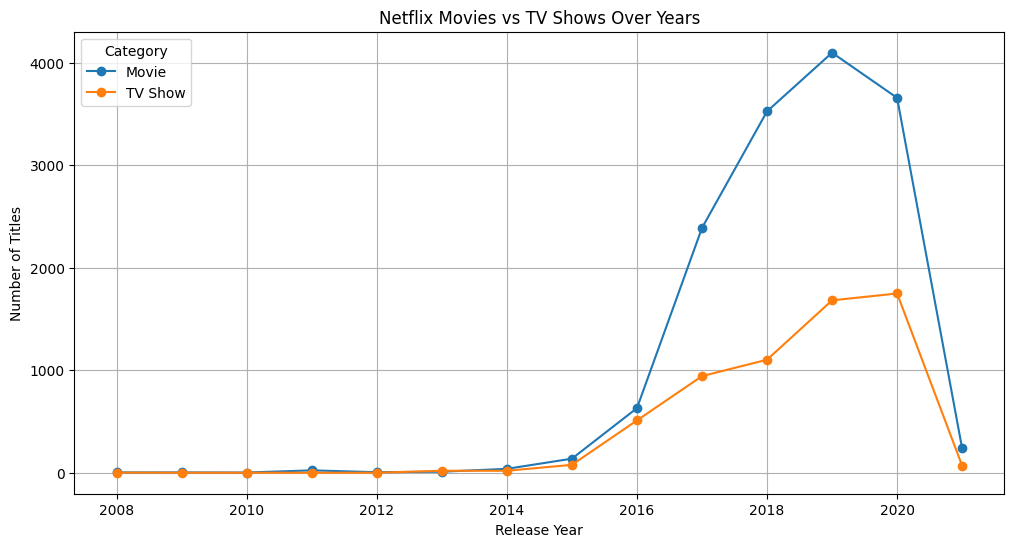

In [146]:
trends_over_year.T.plot(figsize=(12,6), marker='o')
plt.title('Netflix Movies vs TV Shows Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

- Q.- Identifying the most common genres and how their popularity has changed.

In [147]:
Common_genres=df.groupby('Type')['Type'].count().sort_values(ascending=False)
Top10Common=Common_genres.head(10)

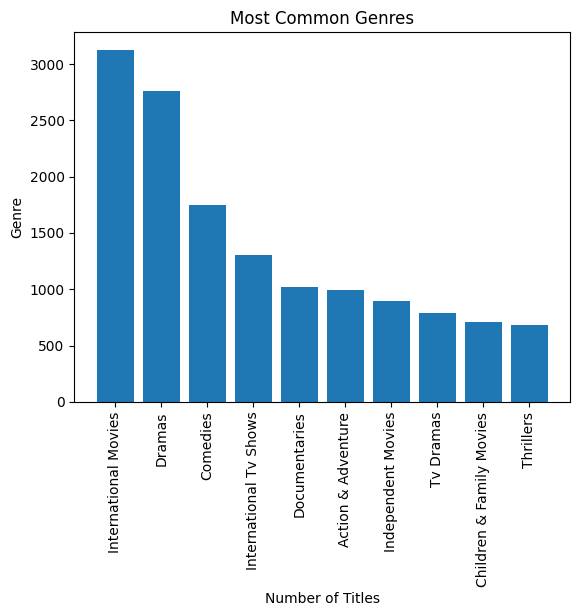

In [148]:
plt.bar(Top10Common.index,Top10Common.values)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.xticks(rotation=90)
plt.title('Most Common Genres')
plt.show()

- Q.- How their popularity has changed.

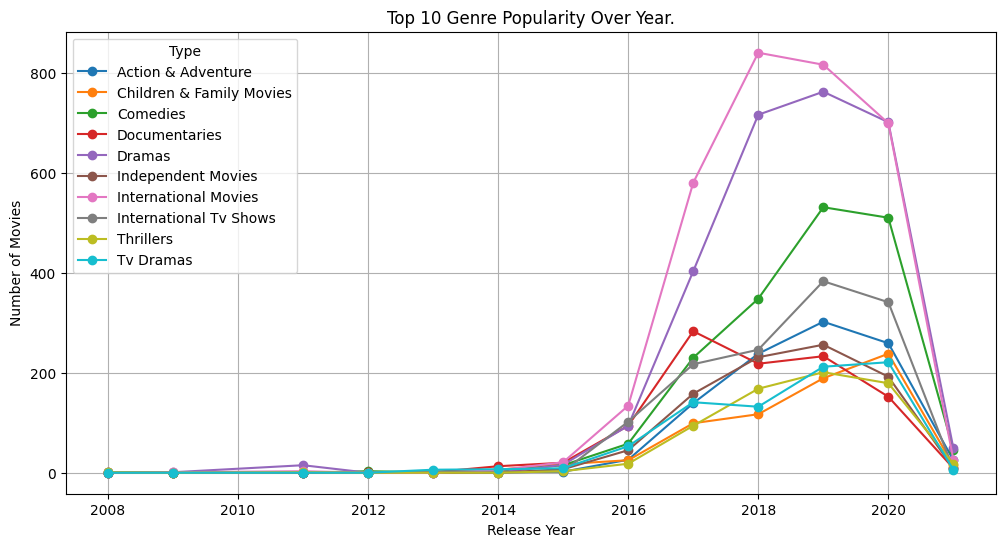

In [149]:
x=df[df['Type'].isin(Top10Common.index)].groupby(['Type','Release_Year'])['Type'].count().unstack(fill_value=0)
x.T.plot(figsize=(12,6), marker='o')
plt.title('Top 10 Genre Popularity Over Year.')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

- Q.- Comparing country-wise contributions to Netflix’s catalog.

In [158]:
contribution=df.groupby('Country')['Show_Id'].count()
contribution=contribution.sort_values(ascending=False)
cont=contribution.head(10)

<Axes: xlabel='Country'>

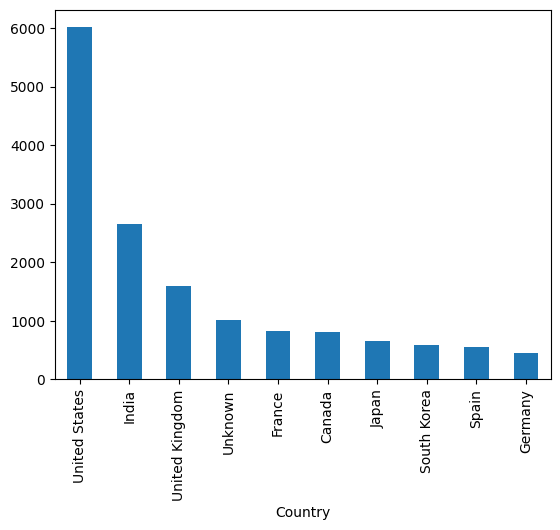

In [160]:
cont.plot(kind='bar')

It means the United States contribute more in the Netflix Catalog.


In [154]:
temp_df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,TV Dramas,In a future where the elite inhabit an island ...
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,TV Sci-Fi & Fantasy,In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,International Movies,After a devastating earthquake hits Mexico Cit...
...,...,...,...,...,...,...,...,...,...,...,...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,United Kingdom,2020-03-01,TV-MA,90 min,Music & Musicals,This documentary delves into the mystique behi...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,Canada,2020-03-01,TV-MA,90 min,Documentaries,This documentary delves into the mystique behi...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,Canada,2020-03-01,TV-MA,90 min,Music & Musicals,This documentary delves into the mystique behi...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,United States,2020-03-01,TV-MA,90 min,Documentaries,This documentary delves into the mystique behi...
